# Additional Plots
## Xiaonan Wang
## 03Oct2019

In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns


from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.4.2 anndata==0.6.19 umap==0.3.8 numpy==1.16.3 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
plt.rcParams["figure.figsize"] = (5,4.5)

In [3]:
## Modified dotplot for visualisation
def modified_dotplot(adata, geneIDs):
    adata.obs['Study'] = adata.obs['Study'].astype('category')
    adata.obs['Study'] = adata.obs['Study'].cat.reorder_categories(['WT', 'Injured', 'Injured_Runx1_KO'])
    
    # First construct the expression matrix for the colours of dots
    Gexp = pd.DataFrame(adata.raw[:,geneIDs].X)
    #print(Gexp.shape)
    Gexp['Study'] = list(adata.obs['Study'])
    Gexp1 = Gexp.groupby('Study').mean()
    Gexp1.columns = geneIDs
    Gexp1 = Gexp1.reindex(['Injured_Runx1_KO', 'Injured', 'WT'])
    #print(Gexp1)
    
    # Then construct the cell number matrix for the sizes of dots
    Gcnt1 = Gexp.groupby('Study').agg({lambda x: (x>0).sum()})
    Gcnt1.columns = geneIDs
    #print(Gcnt1)
    # normalised by total cell number in each sample
    Gcnt2 = Gcnt1.div([4696, 6054, 4665], axis=0) 
    Gcnt2 = Gcnt2.div(np.max(np.max(Gcnt2)))
    Gcnt2 = Gcnt2.reindex(['Injured_Runx1_KO', 'Injured', 'WT'])
    
    # Flatten matrix for plotting
    mean_obs = Gexp1
    fraction_obs = Gcnt2*100
    frac = fraction_obs.values.flatten()
    mean_flat = mean_obs.values.flatten()
    
    import matplotlib
    from matplotlib import collections
    y, x = np.indices(mean_obs.shape)
    y = y.flatten()
    x = x.flatten()
    #mean_obs -= mean_obs.min(0)
    # Here only normalised by dividing max to match the real difference of expression between samples
    mean_obs = (mean_obs / mean_obs.max(0)).fillna(0) 
    mean_flat = mean_obs.values.flatten()
    #print(mean_obs)
    
    # Start plotting, code adopted from scanpy
    fig = plt.figure(figsize=(7, 3))
    grid = plt.GridSpec(6, 8, hspace=0.2, wspace=0.2)
    ax = fig.add_subplot(grid[0:6,0:5])
    ax1 = fig.add_subplot(grid[1:5,5:6])
    ax2 = fig.add_subplot(grid[1:5,7])

    import matplotlib.colors
    normalize = matplotlib.colors.Normalize(vmin=0, vmax=1)
    colors = cmap(normalize(mean_flat))

    scatter= ax.scatter(x, y, color = colors, s=frac, norm=None, edgecolor='none')
    y_ticks = range(mean_obs.shape[0])
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(mean_obs.index)
    x_ticks = range(mean_obs.shape[1])
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(mean_obs.columns, rotation=90)
    ax.set_ylabel('Study')
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin-0.5, ymax + 0.5)
    ax.set_xlim(-1, len(geneIDs))
    ax.grid(False)

    import matplotlib.colorbar
    clegend = matplotlib.colorbar.ColorbarBase(ax1, cmap=cmap, norm=normalize)
    xmin, xmax = ax1.get_xlim()
    ax1.set_xlim(xmin-0.6, xmax + 0.6)

    dot_max = np.ceil(max(frac) * 10) / 10
    dot_min = 0
    #print(dot_max)

    ax2.scatter(np.repeat(0,5), range(5), s=[20,40,60,80,100], color='red')
    ax2.set_yticks(range(5))
    labels = ["{:.0%}".format(x) for x in [0.2,0.4,0.6,0.8,1]]
    ax2.set_yticklabels(labels)
    ax2.yaxis.tick_right()
    xmin, xmax = ax2.get_xlim()
    ax2.set_xlim(xmin-0.5, xmax + 0.5)
    ymin, ymax = ax2.get_ylim()
    ax2.set_ylim(ymin-0.5, ymax + 0.5)
    ax2.grid(False)
    ax2.axes.get_xaxis().set_ticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)

## Fig8e

In [4]:
adata = sc.read('/servers/lila-single-cell/Xiaonan/Zebrafish/New_Batch_Analysis_v2/write/Final_EpiSMC_norm_afterQC.h5ad')

In [5]:
Epidata = adata[adata.obs['louvain_rd10'] == '8', :]
SMCdata = adata[adata.obs['louvain_rd10'] == '10', :]

In [6]:
geneIDs = ['myh11a', 'tagln', 'myl6', 'myl9a', 'myl9b', 'acta2', 'col1a2', 'col1a1b', 'col1a1a']

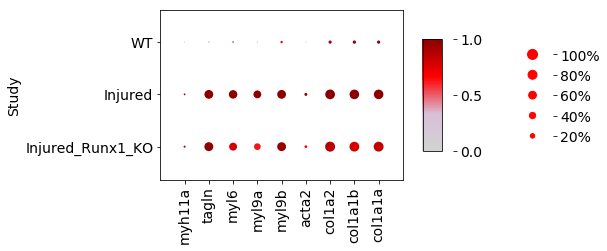

In [7]:
modified_dotplot(Epidata, geneIDs)

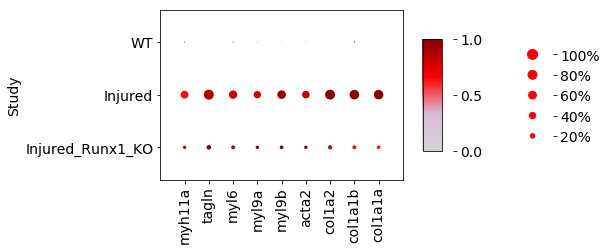

In [8]:
modified_dotplot(SMCdata, geneIDs)

## Fig9a

In [9]:
adata = sc.read('/servers/lila-single-cell/Xiaonan/Zebrafish/New_Batch_Analysis_v2/write/Final_DBpos_norm_afterQC.h5ad')

In [10]:
geneIDs = ['anxa2a', 's100a10b', 'serpine1']

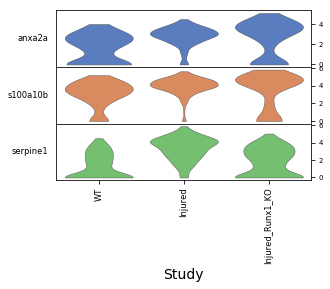

In [11]:
sc.pl.stacked_violin(adata, geneIDs, groupby='Study', 
                     var_group_rotation=0, figsize=(5,3), swap_axes=True, cut=0
                    )

## Fig9c

In [12]:
adata = sc.read('/servers/lila-single-cell/Xiaonan/Zebrafish/New_Batch_Analysis_v2/write/Final_CM_norm_afterQC.h5ad')

In [13]:
adata = adata[adata.obs['Study'] != 'WT',:]
adata.obs['Condition'] = adata.obs['Study'].astype(str) +'_'+ adata.obs['cit'].astype(str)

In [14]:
geneIDs = ['anxa2a', 'calm3a', 'calm2b', 'calm1b',
          'myl7', 'cmlc1', 'actc1a-1', 'tnnt2a']

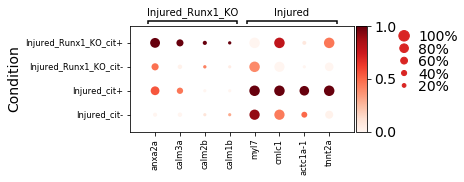

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[4.05, 0, 0.2, 0.5, 0.25])

In [17]:
sc.pl.dotplot(adata, geneIDs, groupby='Condition', 
              var_group_positions=[(0,3), (4,7)],
             var_group_labels=['Injured_Runx1_KO', 'Injured'],
             var_group_rotation=0, figsize=(5,2), standard_scale='var',
               smallest_dot = 10)